# Linear regression


In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
from pandas.plotting import scatter_matrix
from numpy import genfromtxt
from numpy import savetxt
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
import pickle

train = genfromtxt('50LHS.csv', delimiter=',')

dataset= genfromtxt('1000Rand_WithDiam.csv', delimiter=',')

Assigning training and test data sets

In [44]:
#Angle and Velocity inputs

Output = 5       #Col5 = Penetration | Col6 = Impact Force

Xtrain = train[:, [0, 1, 2, 3]]   #Col0 = Angle | Col1 = Velocity | Col2 = DLeg | Col0 = Angle
Ytrain = train[:, Output]   

Xtest = dataset[:, [0, 1, 2, 3]]
Ytest = dataset[:, Output]

Selection of the degree and training of the polynomial

In [57]:
degree = 5

poly = PolynomialFeatures(degree)

#tranformation of the inputs
Trainfeatures = poly.fit_transform(Xtrain)
Testfeatures = poly.fit_transform(Xtest)

#fitting of the model using training input values and training observations
model = LinearRegression().fit(Trainfeatures, Ytrain)

#prediction of the model
# Ypredtrain = model.predict(Trainfeatures)
Ypredtest = model.predict(Testfeatures)


# Loss ---------------------------
TestLoss = np.mean((Ypredtest-Ytest)**2)
# TrainLoss = np.mean((Ypredtrain-Ytrain)**2)


# print('Train Loss:' ,TrainLoss)
print('Test Loss:' ,TestLoss)

%matplotlib notebook 
#index ===
#inputs ===  (0)Angle; (1)Velocity; (2)Dleg; (3)Dbrace; 

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtest[:,1],Xtest[:,2], Ytest, 'r')
ax.scatter(Xtest[:,1],Xtest[:,2], Ypredtest, 'b')
ax.set_xlabel('Velocity')
ax.set_ylabel('DLeg')
ax.set_zlabel('Penetration')

Test Loss: 4.0306117170866775


Save and export the model

In [59]:
#to save and export the model

filename = 'Poly50p_5degree.sav'
pickle.dump(model, open(filename, 'wb'))

# Training with n randomly distributed points (from dataset)

In [155]:
n=500   #Max batch size for training

#Spliting of points for training and testing
np.random.shuffle(dataset)
training, test = dataset[:n,:], dataset[n:,:]

#Angle and Velocity inputs

Output = 5       #Col5 = Penetration | Col6 = Impact Force

Xtrain = training[:, [0, 1, 2, 3]]   #Col0 = Angle | Col1 = Velocity | Col2 = DLeg | Col0 = Angle
Ytrain = training[:, Output]   

Xtest = test[:, [0, 1, 2, 3]]
Ytest = test[:, Output]

Save and export the training and test datasets

In [144]:
filename= '50rnd.csv'

data = np.concatenate((training, test), axis=0)

savetxt(filename, data , delimiter=',')
print('Saved dataset: ',filename)

Saved dataset:  50rnd.csv


Test Loss: 0.01937272895234812


<IPython.core.display.Javascript object>


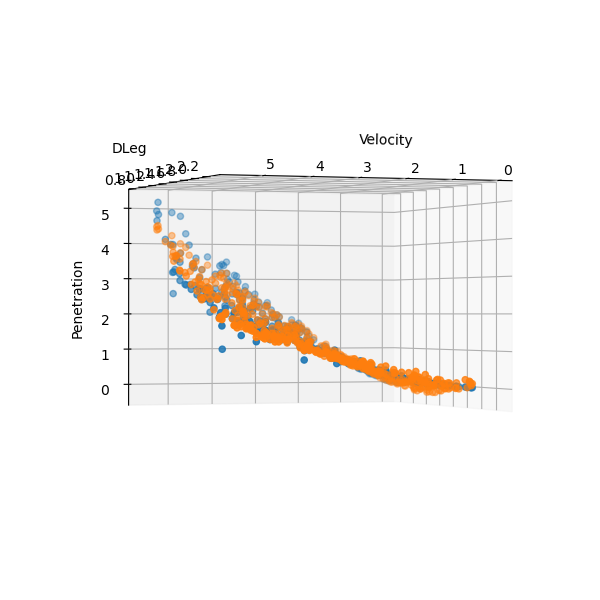

Text(0.5, 0, 'Penetration')

In [157]:
degree = 2

poly = PolynomialFeatures(degree)

#tranformation of the inputs
Trainfeatures = poly.fit_transform(Xtrain)
Testfeatures = poly.fit_transform(Xtest)

#fitting of the model using training input values and training observations
model = LinearRegression().fit(Trainfeatures, Ytrain)

#prediction of the model
# Ypredtrain = model.predict(Trainfeatures)
Ypredtest = model.predict(Testfeatures)

# Loss ---------------------------
TestLoss = np.mean((Ypredtest-Ytest)**2)
# TrainLoss = np.mean((Ypredtrain-Ytrain)**2)

# print('Train Loss:' ,TrainLoss)
print('Test Loss:' ,TestLoss)

%matplotlib notebook 
#index ===
#inputs ===  (0)Angle; (1)Velocity; (2)Dleg; (3)Dbrace; 

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtest[:,1],Xtest[:,2], Ytest, 'r')
ax.scatter(Xtest[:,1],Xtest[:,2], Ypredtest, 'b')
ax.set_xlabel('Velocity')
ax.set_ylabel('DLeg')
ax.set_zlabel('Penetration')

Save and export the model

In [154]:
#to save and export the model

modelname = 'Poly50rdnp_5degree.sav'
pickle.dump(model, open(modelname, 'wb'))
print('Saved mode: ',model)

Saved mode:  LinearRegression()


In [1]:
#Angle and Velocity inputs
Angle= x[:,0]
Veloc = x[:,1]
DLeg = x[:,2]
Dbrace = x[:,3]

# timetostop = x[:,4]
Penetration = x[:,5]
Force = x[:,6]

#Define the output for the predictions
Output = Penetration


#Spliting of points for training and testing

MaxSamples=100   #Max batch size for training

MaxTest=len(Angle)-MaxSamples

#Max training points
Xtrain = np.zeros((MaxSamples,4))
Ytrain = np.zeros(MaxSamples)

Xtrain[:,0] = Angle[:MaxSamples]
Xtrain[:,1] = Veloc[:MaxSamples]
Xtrain[:,2] = DLeg[:MaxSamples]
Xtrain[:,3] = Dbrace[:MaxSamples]

Ytrain = Output[:MaxSamples]

#Max testing points
Xtest = np.zeros((MaxTest,4))
Ytest = np.zeros(MaxTest)

Xtest[:,0] = Angle[-MaxTest:]
Xtest[:,1] = Veloc[-MaxTest:]
Xtest[:,2] = DLeg[-MaxTest:]
Xtest[:,3] = Dbrace[-MaxTest:]

Ytest = Output[-MaxTest:]





    
    for j in range(0, i): #filling corresponding samplings
        
        value = Xtrainb[j,0]
        
        index,= np.where(np.isclose(Xtrain[:,0], value, tol))
           
        Xtrainb[j,1] = Xtrain[index,1]
        Xtrainb[j,2] = Xtrain[index,2]
        Xtrainb[j,3] = Xtrain[index,3]

        Ytrainb[j]= Output[index]

In [2]:
degree = 2
tol = 0.00001    #tolerance for finding correspondent training elements 

poly = PolynomialFeatures(degree)

TestLoss = []    #to keep track of the TEST lossess
TrainLoss = []   #to keep track of the TRAIN lossess

for i in range (1 , MaxSamples+1):
    
    Xtrainb = np.zeros((i,4))
    Ytrainb = np.zeros(i)
    
    Xtrainb[:,0] = np.random.choice(Xtrain[:,0], size=i, replace=False)  #random choice of angles
    
    for j in range(0, i): #filling corresponding samplings
        
        value = Xtrainb[j,0]
        
        index,= np.where(np.isclose(Xtrain[:,0], value, tol))
           
        Xtrainb[j,1] = Xtrain[index,1]
        Xtrainb[j,2] = Xtrain[index,2]
        Xtrainb[j,3] = Xtrain[index,3]

        Ytrainb[j]= Output[index]

    #tranformation of the inputs
    Trainfeatures = poly.fit_transform(Xtrainb)
    Testfeatures = poly.fit_transform(Xtest)

    #fitting of the model using training input values and training observations
    model = LinearRegression().fit(Trainfeatures, Ytrainb)

    #prediction of the model
    Ypredtrain = model.predict(Trainfeatures)
    Ypredtest = model.predict(Testfeatures)
    
    # TrainLoss ---------------------------
    Loss__ = np.mean((Ypredtrain-Ytrainb)**2)
    TrainLoss.append(Loss__)
    
    # TestLoss ---------------------------
    Loss_= np.mean((Ypredtest-Ytest)**2)    
    TestLoss.append(Loss_)

In [1]:
# fig, ax =plt.subplots(figsize=(8, 8))
# ax.plot(TestLoss,'b', label='TestLoss')
# ax.plot(TrainLoss,'r',label='TrainLoss')
# plt.ylim([0.0, 0.1])

In [2]:
# fig, ax =plt.subplots(figsize=(10, 10))
# ax.plot(TestLoss,'b', label='TestLoss')
# ax.plot(TrainLoss,'r',label='TrainLoss')
# plt.ylim([0.0, 10])

In [26]:
#Sampling
import time
start = time.time()
samples= 10 #for training
degree_ = 3  #Degree of the predictor
tol = 0.00001

Xtrainb = np.zeros((samples,4))
Ytrainb = np.zeros(samples)
    
Xtrainb[:,0] = np.random.choice(Xtrain[:,0], size=samples, replace=False)  #random choice of angles

for j in range (0,samples): #filling corresponding samplings
        
    value = Xtrainb[j,0]
        
    index,= np.where(np.isclose(Xtrain[:,0], value, tol))
           
    Xtrainb[j,1] = Xtrain[index,1]
    Xtrainb[j,2] = Xtrain[index,2]
    Xtrainb[j,3] = Xtrain[index,3]

    Ytrainb[j]= Output[index]

poly_ = PolynomialFeatures(degree_)
#tranformation of the inputs
Trainfeatures_ = poly_.fit_transform(Xtrainb)
Testfeatures_ = poly_.fit_transform(Xtest)

#fitting of the model using training input values and training observations
model_ = LinearRegression().fit(Trainfeatures_, Ytrainb)

#prediction of the model
Ypredtest_ = model_.predict(Testfeatures_)
Ypredtrain_ = model_.predict(Trainfeatures_)

# Loss ---------------------------
TestLoss_ = np.mean((Ypredtest_-Ytest)**2)
TrainLoss_ = np.mean((Ypredtrain_-Ytrainb)**2)

print('Train Loss:' ,TrainLoss_)
print('Test Loss:' ,TestLoss_)
end = time.time()
print(end - start)

Train Loss: 1.250379740774687e-27
Test Loss: 1.1068014145743423
0.005986928939819336


<IPython.core.display.Javascript object>


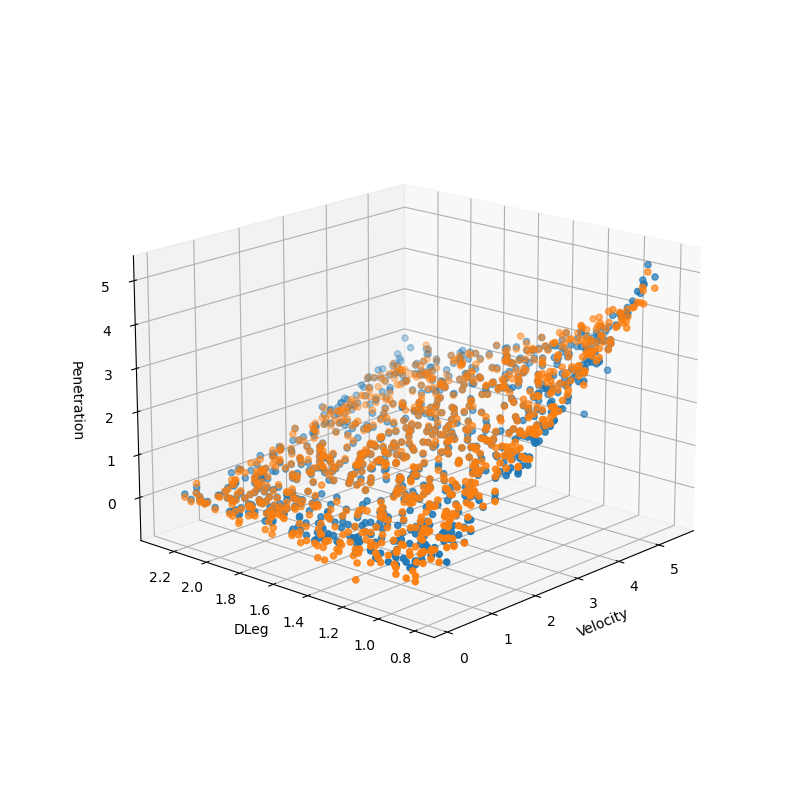

Text(0.5, 0, 'Penetration')

In [24]:
%matplotlib notebook 
#index ===
#inputs ===  (0)Angle; (1)Velocity; (2)Dleg; (3)Dbrace; 

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xtest[:,1],Xtest[:,2], Ytest, 'r')
ax.scatter(Xtest[:,1],Xtest[:,2], Ypredtest_, 'b')
ax.set_xlabel('Velocity')
ax.set_ylabel('DLeg')
ax.set_zlabel('Penetration')


In [ ]:
x_ = x[:,[0,1,2,3,5,6]]

df = pd.DataFrame(x_, columns=["Angle", "Velocity", "DLeg", "DBrace", "Penetration", "Max.Force"])
scatter_matrix(df, figsize=(10, 10));

In [ ]:
#Sampling

samples=100 #for training (< MaxSamples)
tol = 0.00001
Xtrain_ = np.zeros((samples,4))
Ytrain_ = np.zeros(samples)

maxdegree = 5

for i in range (1 , maxdegree):

    Xtrain_[:,0] = np.random.choice(Xtrain[:,0], size=samples, replace=False)  #random choice of angles
    
    for j in range (0,i): #filling corresponding samplings
        
        value = Xtrain_[j,0]
        
        index,= np.where(np.isclose(Xtrain[:,0], value, tol))
           
        Xtrain_[j,1] = Xtrain[index,1]
        Xtrain_[j,2] = Xtrain[index,2]
        Xtrain_[j,3] = Xtrain[index,3]

        Ytrain_[j]= Output[index]
    
    poly_ = PolynomialFeatures(i)
    #tranformation of the inputs
    Trainfeatures_ = poly_.fit_transform(Xtrain_)
    Testfeatures_ = poly_.fit_transform(Xtest)

    #fitting of the model using training input values and training observations
    model_ = LinearRegression().fit(Trainfeatures_, Ytrain_)

    #prediction of the model
    Ypredtest_ = model_.predict(Testfeatures_)
    Ypredtrain_ = model_.predict(Trainfeatures_)

    # Loss ---------------------------
    TestLoss_ = np.mean((Ypredtest_-Ytest)**2)
    TrainLoss_ = np.mean((Ypredtrain_-Ytrain_)**2)

In [ ]:
fig, ax =plt.subplots(figsize=(10, 10))
ax.plot(TestLoss_,'b', label='TestLoss')
ax.plot(TrainLoss_,'r',label='TrainLoss')
# plt.ylim([0.0, 0.5])
